## Imports

In [1]:
!pip install pyccel

     |████████████████████████████████| 350 kB 16.0 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [3]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):
    
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
    return 0

## Numba accelerator

In [4]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
    return 0

## Pyccel accelerator

In [6]:
def solve_1d_nonlinearconv_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float'):

    for n in range(nt):
        un[:] = u[:]
        for i in range(1, nx):
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

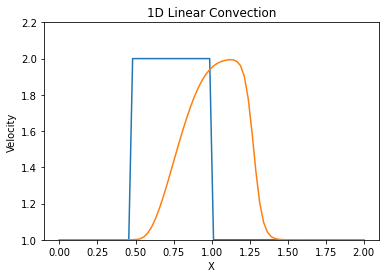

In [7]:
nx = 80  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt =200 #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

#### interprétation : lorsque on effectue des modifications sur nt et nx , on constate que le graphe démontre l'éxistance en plus du transport une diffusion et cette diffusion est liée à l'effet de descritisation qui engendre une perte d'information 

## Call Funtions

### Pure function

In [8]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

10 loops, best of 5: 16.3 ms per loop


### Function with numba accelerator

In [9]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

The slowest run took 13816.32 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 26.8 µs per loop


### Function with pyccel accelerator

In [10]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

In [11]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

10000 loops, best of 5: 22.8 µs per loop
